In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import json

In [2]:
train_num_correct = (np.concatenate([np.load("../data/MATH_aug/train_aug_1_answer_types5_seed2.npy"), np.load("../data/MATH_aug/train_aug_2_answer_types5_seed2.npy")], axis=0)==0).sum(axis=-1)
easy_idxs = np.where(train_num_correct>2)[0]
hard_idxs = np.where(train_num_correct<=2)[0]

In [3]:
easy_idxs

array([     0,      5,      7, ..., 147784, 147785, 147786])

In [4]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [5]:
NUM_TRAIN_POINTS=20000

ratios_all_testeasy = []

for EASY_RATIO in [1., 0.75, 0.5, 0.25]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("../ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_train_idxs))[0]
        easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]


        incorrect = 0
        exact_match = 0
        correct_different = 0
        predictions =[]
        references = []
        for input_idx in easy_subsample:
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        exact_match+=1
                    else:
                        correct_different+=1
                    predictions.append(train_samples[input_idx][sample_idx].strip())
                    references.append(train_answers[subsample_idxs[input_idx]].strip())
                else:
                    incorrect+=1
        total = exact_match+correct_different+incorrect
        print(total)
        print(exact_match/total, correct_different/total, incorrect/total)
        ratios.append([exact_match/total, correct_different/total, incorrect/total])
    ratios_all_testeasy.append(ratios)
ratios_all_testeasy = np.array(ratios_all_testeasy)

25000
0.00796 0.318 0.67404
25000
0.05176 0.4826 0.46564
25000
0.22608 0.52936 0.24456
25000
0.53744 0.36436 0.0982
18595
0.0052164560365689705 0.30029577843506317 0.6944877655283679
18595
0.03694541543425652 0.4867437483194407 0.47631083624630277
18595
0.17789728421618714 0.5436407636461414 0.27846195213767144
18595
0.4632428072062382 0.4175853724119387 0.11917182038182307
12460
0.0036115569823434992 0.29614767255216695 0.7002407704654896
12460
0.028491171749598716 0.46452648475120384 0.5069823434991975
12460
0.15746388443017656 0.5496789727126806 0.29285714285714287
12460
0.4153290529695024 0.44317817014446226 0.14149277688603532
6390
0.003129890453834116 0.2777777777777778 0.7190923317683882
6390
0.02629107981220657 0.44992175273865415 0.5237871674491393
6390
0.13474178403755868 0.5377151799687011 0.32754303599374024
6390
0.3561815336463224 0.4629107981220657 0.1809076682316119


In [9]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard = []

for EASY_RATIO in [0.75, 0.5, 0.25, 0.]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("../ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_train_idxs))[0]
        easy_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]


        incorrect = 0
        exact_match = 0
        correct_different = 0
        predictions =[]
        references = []
        for input_idx in easy_subsample:
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        exact_match+=1
                    else:
                        correct_different+=1
                    predictions.append(train_samples[input_idx][sample_idx].strip())
                    references.append(train_answers[subsample_idxs[input_idx]].strip())
                else:
                    incorrect+=1
        total = exact_match+correct_different+incorrect
        print(total)
        print(exact_match/total, correct_different/total, incorrect/total)
        ratios.append([exact_match/total, correct_different/total, incorrect/total])
    ratios_all_testhard.append(ratios)
ratios_all_testhard = np.array(ratios_all_testhard)

6405
0.000156128024980484 0.054488680718188916 0.9453551912568307
6405
0.004215456674473068 0.08540202966432475 0.9103825136612022
6405
0.043871975019516 0.17236533957845435 0.7837626854020296
6405
0.2281030444964871 0.20889929742388758 0.5629976580796253
12540
0.0001594896331738437 0.05701754385964912 0.942822966507177
12540
0.00645933014354067 0.09928229665071771 0.8942583732057416
12540
0.06427432216905901 0.1886762360446571 0.7470494417862839
12540
0.27025518341307814 0.2039872408293461 0.5257575757575758
18610
0.000322407307898979 0.05201504567436862 0.9476625470177324
18610
0.008812466415905428 0.10628694250403009 0.8849005910800645
18610
0.07947340139709834 0.19177861364857604 0.7287479849543256
18610
0.31939817302525525 0.2058033315421816 0.47479849543256314
25000
0.00088 0.05916 0.93996
25000
0.01344 0.12068 0.86588
25000
0.116 0.21204 0.67196
25000
0.39992 0.19516 0.40492


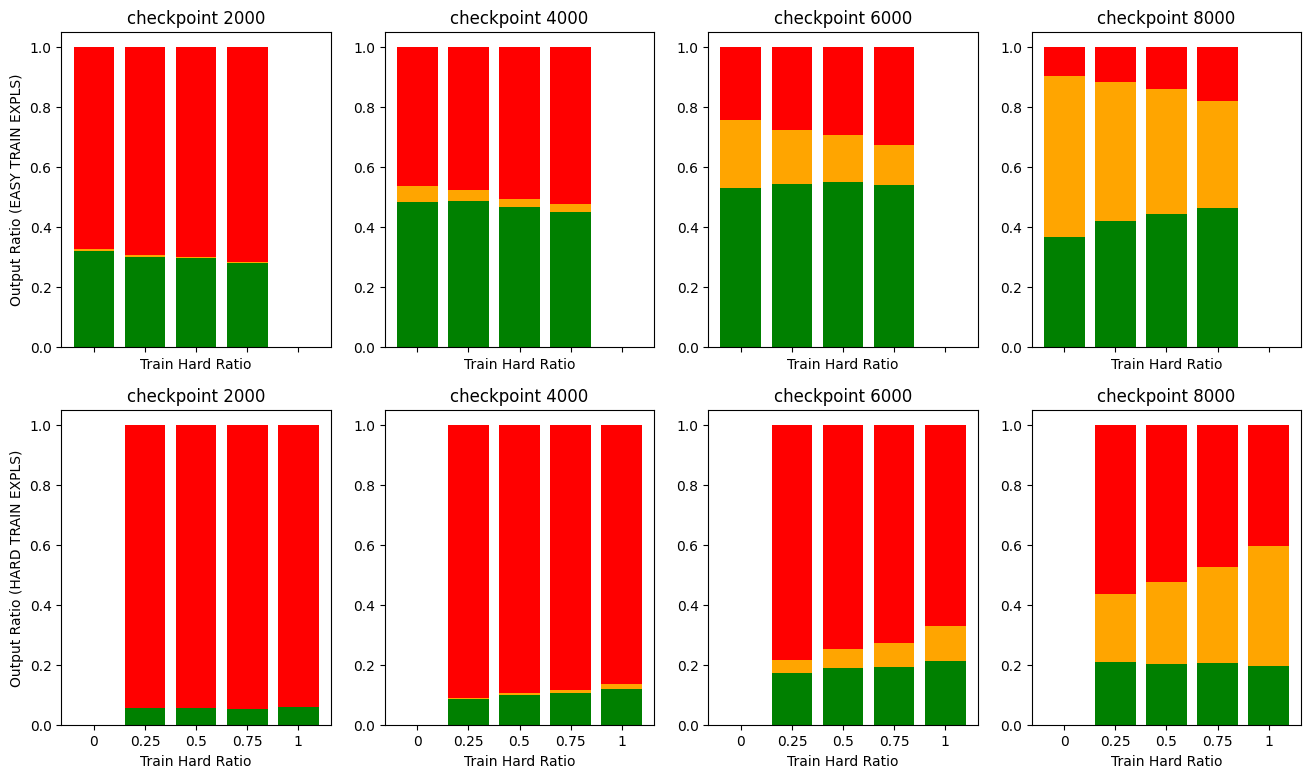

In [13]:
# [exact_match/total, correct_different/total, incorrect/total]

fig, axs = plt.subplots(2, 4, figsize=(16, 9), sharex=True)

j=0
for i in range(4):
    for k in range(4):

        axs[j][i].bar([k], [1], color='r', label = "incorrect")
        axs[j][i].bar([k], [ratios_all_testeasy[k][i][1]+ratios_all_testeasy[k][i][0]], color='orange', label = "correct memorized")
        axs[j][i].bar([k], [ratios_all_testeasy[k][i][1]], color='g', label = "correct different")

        # axs[j][i].bar([2], [1], color='r')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

        # axs[j][i].bar([1], [1], color='r')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
        # axs[j][i].bar([0], [1], color='r')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
    axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
    axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
    axs[j][i].set_xlabel("Train Hard Ratio")
    axs[j][0].set_ylabel("Output Ratio (EASY TRAIN EXPLS)")
    
j=1
for i in range(4):
    for k in range(4):

        axs[j][i].bar([k+1], [1], color='r', label = "incorrect")
        axs[j][i].bar([k+1], [ratios_all_testhard[k][i][1]+ratios_all_testhard[k][i][0]], color='orange', label = "correct memorized")
        axs[j][i].bar([k+1], [ratios_all_testhard[k][i][1]], color='g', label = "correct different")

        # axs[j][i].bar([2], [1], color='r')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

        # axs[j][i].bar([1], [1], color='r')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
        # axs[j][i].bar([0], [1], color='r')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
    axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
    axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
    axs[j][i].set_xlabel("Train Hard Ratio")
    axs[j][0].set_ylabel("Output Ratio (HARD TRAIN EXPLS)")
# fig.legend(loc='center right')


In [71]:
NUM_TRAIN_POINTS=20000

ratios_all_testeasy = []

for EASY_RATIO in [1. ,0.75, 0.5, 0.25,]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("../ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_train_idxs))[0]
        easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



        num_memorized_all = []
        num_correct_different_all = []
        num_incorrect_all = []

        for input_idx in (easy_subsample):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_all.append(num_memorized)
            num_correct_different_all.append(num_correct_different)
            num_incorrect_all.append(num_incorrect)

        num_memorized_all = np.array(num_memorized_all)
        num_correct_different_all = np.array(num_correct_different_all)
        num_incorrect_all = np.array(num_incorrect_all)
        
        ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testeasy.append(ratios)
ratios_all_testeasy= np.array(ratios_all_testeasy)
        # ratios_all_testeasy

In [72]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard = []

for EASY_RATIO in [0.75, 0.5, 0.25,0.]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("../ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
        # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



        num_memorized_all = []
        num_correct_different_all = []
        num_incorrect_all = []

        for input_idx in (hard_subsample):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_all.append(num_memorized)
            num_correct_different_all.append(num_correct_different)
            num_incorrect_all.append(num_incorrect)

        num_memorized_all = np.array(num_memorized_all)
        num_correct_different_all = np.array(num_correct_different_all)
        num_incorrect_all = np.array(num_incorrect_all)
        
        ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard.append(ratios)
ratios_all_testhard= np.array(ratios_all_testhard)
        # ratios_all_testeasy

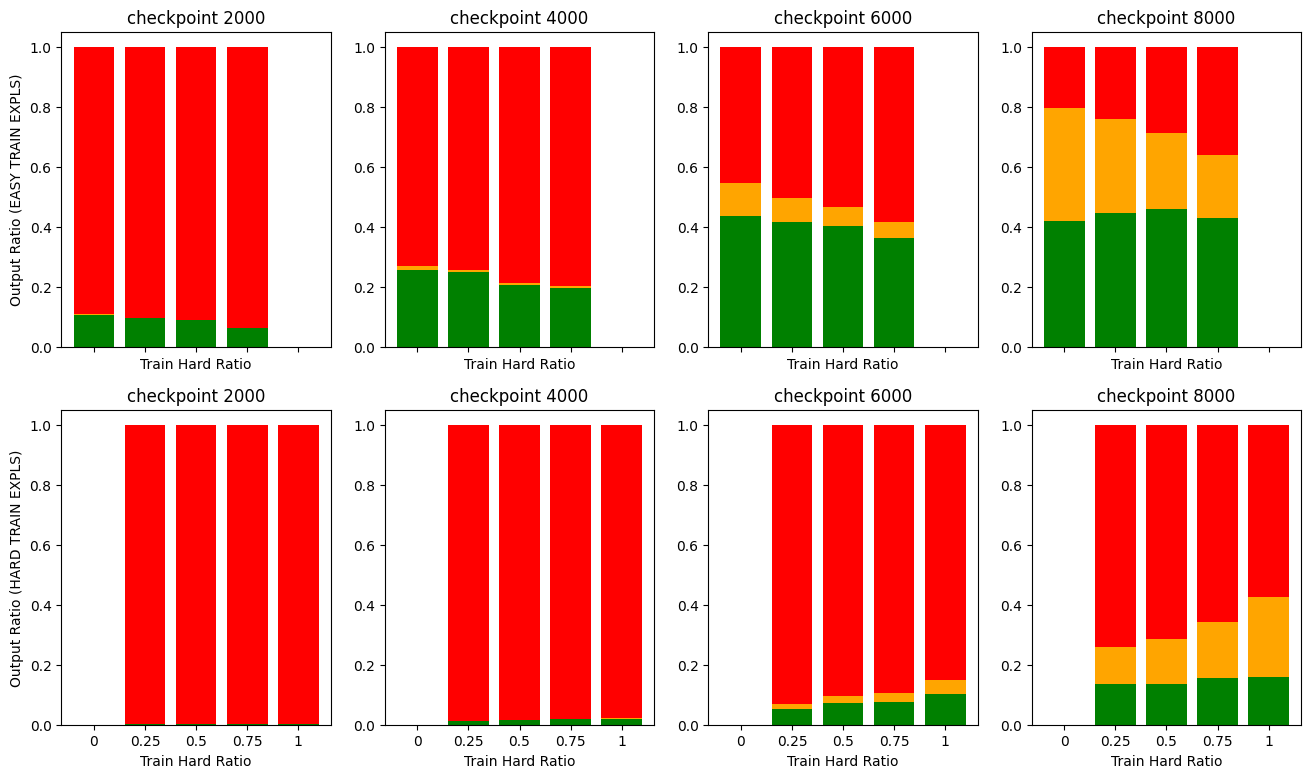

In [73]:
# [exact_match/total, correct_different/total, incorrect/total]

fig, axs = plt.subplots(2, 4, figsize=(16, 9), sharex=True)

j=0
for i in range(4):
    for k in range(4):

        axs[j][i].bar([k], [1], color='r', label = "incorrect")
        axs[j][i].bar([k], [1-ratios_all_testeasy[k][i][1]], color='orange', label = "correct memorized")
        axs[j][i].bar([k], [1-ratios_all_testeasy[k][i][1]-ratios_all_testeasy[k][i][0]], color='g', label = "correct different")

        # axs[j][i].bar([2], [1], color='r')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

        # axs[j][i].bar([1], [1], color='r')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
        # axs[j][i].bar([0], [1], color='r')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
    axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
    axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
    axs[j][i].set_xlabel("Train Hard Ratio")
    axs[j][0].set_ylabel("Output Ratio (EASY TRAIN EXPLS)")
    
j=1
for i in range(4):
    for k in range(4):

        axs[j][i].bar([k+1], [1], color='r', label = "incorrect")
        axs[j][i].bar([k+1], [1-ratios_all_testhard[k][i][1]], color='orange', label = "correct memorized")
        axs[j][i].bar([k+1], [1-ratios_all_testhard[k][i][1]-ratios_all_testhard[k][i][0]], color='g', label = "correct different")

        # axs[j][i].bar([2], [1], color='r')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

        # axs[j][i].bar([1], [1], color='r')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
        # axs[j][i].bar([0], [1], color='r')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
    axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
    axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
    axs[j][i].set_xlabel("Train Hard Ratio")
    axs[j][0].set_ylabel("Output Ratio (HARD TRAIN EXPLS)")
# fig.legend(loc='center right')


In [7]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard = []

for EASY_RATIO in [1., 0.75, 0.5, 0.25,0.]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("../ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("../ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
        # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



        num_memorized_all = []
        num_correct_different_all = []
        num_incorrect_all = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_all.append(num_memorized)
            num_correct_different_all.append(num_correct_different)
            num_incorrect_all.append(num_incorrect)

        num_memorized_all = np.array(num_memorized_all)
        num_correct_different_all = np.array(num_correct_different_all)
        num_incorrect_all = np.array(num_incorrect_all)
        
        ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard.append(ratios)
ratios_all_testhard= np.array(ratios_all_testhard)
        # ratios_all_testeasy

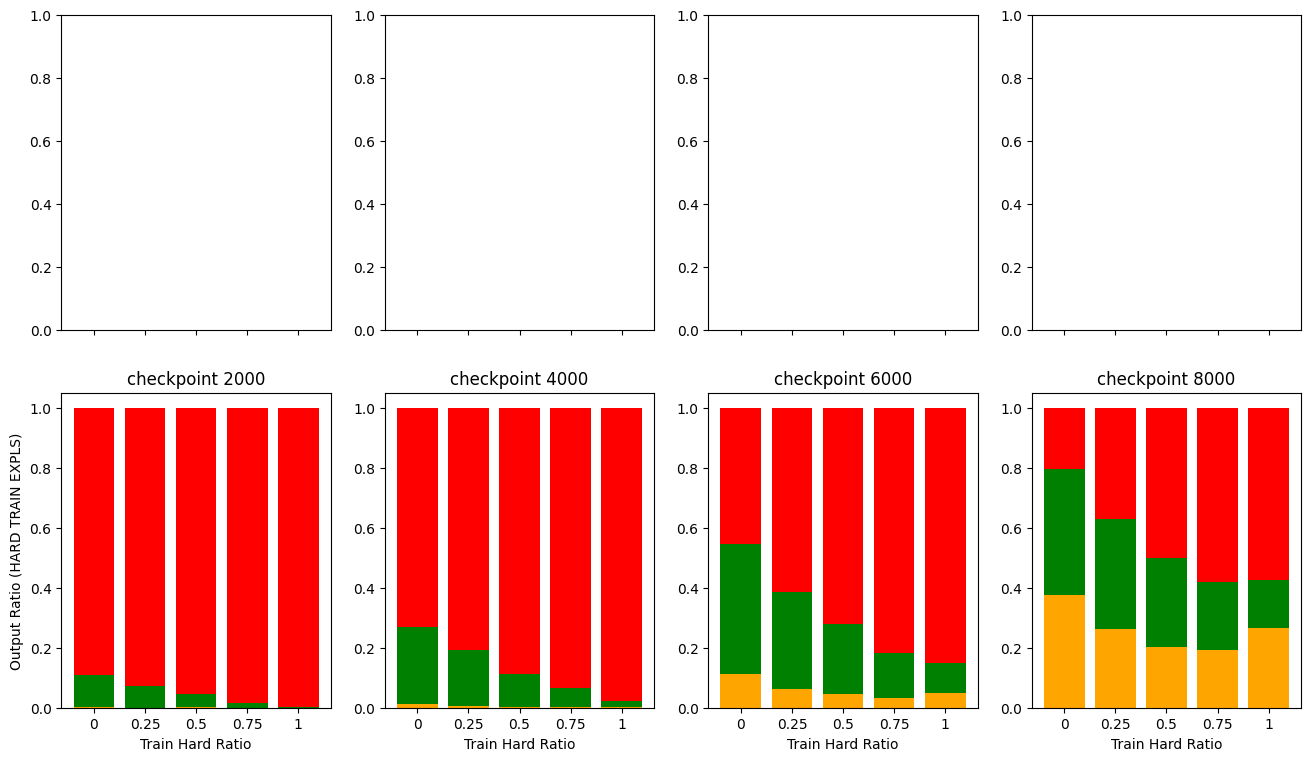

In [9]:
# [exact_match/total, correct_different/total, incorrect/total]

fig, axs = plt.subplots(2, 4, figsize=(16, 9), sharex=True)

# j=0
# for i in range(4):
#     for k in range(4):

#         axs[j][i].bar([k], [1], color='r', label = "incorrect")
#         axs[j][i].bar([k], [1-ratios_all_testeasy[k][i][1]], color='orange', label = "correct memorized")
#         axs[j][i].bar([k], [1-ratios_all_testeasy[k][i][1]-ratios_all_testeasy[k][i][0]], color='g', label = "correct different")

#         # axs[j][i].bar([2], [1], color='r')
#         # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
#         # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

#         # axs[j][i].bar([1], [1], color='r')
#         # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
#         # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
#         # axs[j][i].bar([0], [1], color='r')
#         # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
#         # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
#     axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
#     axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
#     axs[j][i].set_xlabel("Train Hard Ratio")
#     axs[j][0].set_ylabel("Output Ratio (EASY TRAIN EXPLS)")
    
j=1
for i in range(4):
    for k in range(5):

        axs[j][i].bar([k], [1], color='r', label = "incorrect")
        # axs[j][i].bar([k], [1-ratios_all_testhard[k][i][1]], color='orange', label = "correct memorized")
        # axs[j][i].bar([k], [1-ratios_all_testhard[k][i][1]-ratios_all_testhard[k][i][0]], color='g', label = "correct different")


        axs[j][i].bar([k], [1-ratios_all_testhard[k][i][1]], color='g', label = "correct memorized")
        axs[j][i].bar([k], [ratios_all_testhard[k][i][0]], color='orange', label = "correct different")

        # axs[j][i].bar([2], [1], color='r')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

        # axs[j][i].bar([1], [1], color='r')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
        # axs[j][i].bar([0], [1], color='r')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
    axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
    axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
    axs[j][i].set_xlabel("Train Hard Ratio")
    axs[j][0].set_ylabel("Output Ratio (HARD TRAIN EXPLS)")
# fig.legend(loc='center right')


In [10]:
ratios_all_testhard[:, -1, 0]

array([0.3762, 0.2624, 0.2018, 0.1916, 0.266 ])

array([0.2032, 0.3698, 0.5016, 0.5824, 0.5758])

Text(0, 0.5, 'train accs')

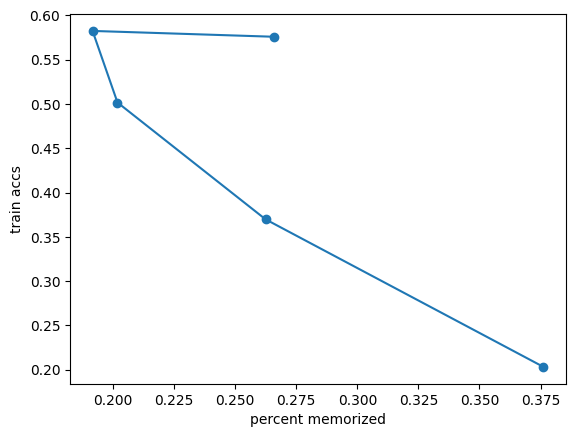

In [12]:
plt.plot([0.3762, 0.2624, 0.2018, 0.1916, 0.266 ], ratios_all_testhard[:, -1, 1], "o-")

plt.xlabel("percent memorized")
plt.ylabel("train accs")

In [ ]:
# all incorrect
# all memorized correct
# rest

(array([3151.,    0.,  470.,    0.,  274.,    0.,  223.,    0.,  275.,
         607.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

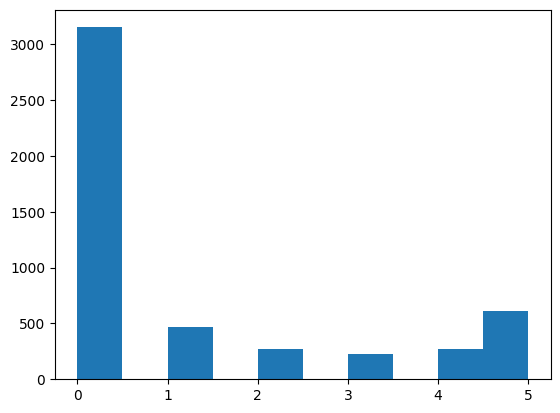

In [51]:
plt.hist(num_incorrect_all)

/tmp/ipykernel_31292/3331292603.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist(num_correct_different_all/(num_memorized_all+num_correct_different_all), bins = [0, 0.2, 0.4, 0.6, 0.8, 1])


(array([1666.,  382.,  286.,  222., 1233.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

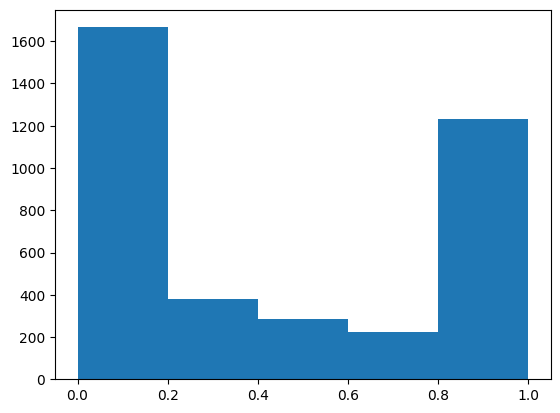

In [28]:
plt.hist(num_correct_different_all/(num_memorized_all+num_correct_different_all), bins = [0, 0.2, 0.4, 0.6, 0.8, 1])

/tmp/ipykernel_31292/2294841242.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist((num_correct_different_all/(num_memorized_all+num_correct_different_all))[np.where(train_num_correct[subsample_idxs]==0)[0]], bins = [0, 0.2, 0.4, 0.6, 0.8, 1])


(array([961., 208., 159., 128., 631.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

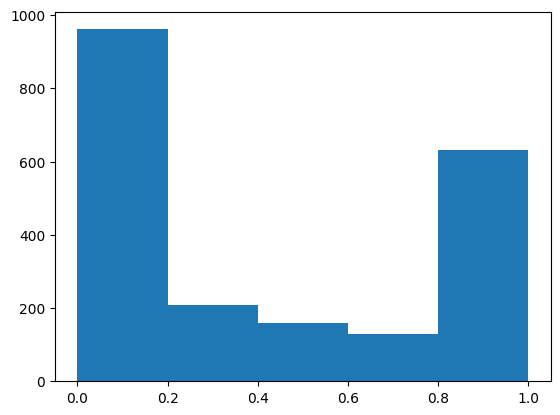

In [46]:
plt.hist((num_correct_different_all/(num_memorized_all+num_correct_different_all))[np.where(train_num_correct[subsample_idxs]==0)[0]], bins = [0, 0.2, 0.4, 0.6, 0.8, 1])

/tmp/ipykernel_31292/2673504359.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist((num_correct_different_all/(num_memorized_all+num_correct_different_all))[np.where(train_num_correct[subsample_idxs]==0)[0]], bins = [0, 0.2, 0.4, 0.6, 0.8, 1])


(array([112.,  45.,  39.,  22., 182.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

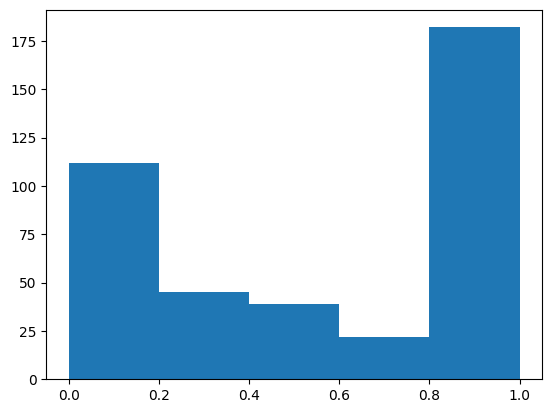

In [50]:


plt.hist((num_correct_different_all/(num_memorized_all+num_correct_different_all))[np.where(train_num_correct[subsample_idxs]==0)[0]], bins = [0, 0.2, 0.4, 0.6, 0.8, 1])

/tmp/ipykernel_31292/1829495437.py:1: RuntimeWarning: invalid value encountered in divide
  plt.scatter(train_num_correct[subsample_idxs], num_correct_different_all/(num_memorized_all+num_correct_different_all), alpha=0.05)


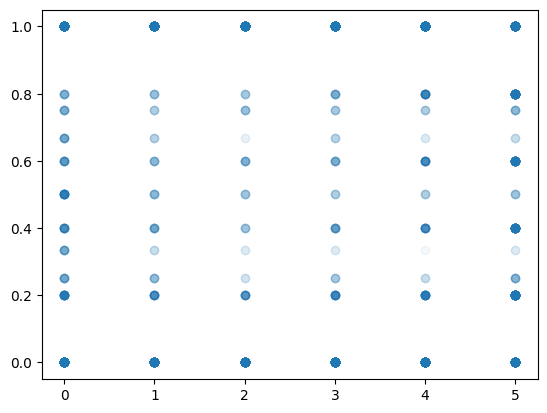

In [33]:
plt.scatter(, num_correct_different_all/(num_memorized_all+num_correct_different_all), alpha=0.05)